In [1]:
import numpy as np
import pandas as pd
import requests, zipfile, io
import re
import os

%load_ext autoreload
%autoreload 2
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 400)

data_dir = '../data'
cache_dir = os.path.join(data_dir, 'cache')
import sys
sys.path.append('..')
from opencanada.statscan import to_wide_format, read_statscan_csv, StatscanZip
from opencanada.io import unzip_data

2019-06-24 20:39:13,053 Property "cache_dir" set to data


In [2]:
def getCanZips(datasets):
    dataset_list = list()
    if type(datasets) == list:
        for set_id in datasets:
            r = requests.get("https://www150.statcan.gc.ca/t1/wds/rest/getFullTableDownloadCSV/{}/en".format(set_id))
            print(r)
            dataset = StatscanZip(r.json()['object'])
            dataset_list.append(dataset)
        if (len(dataset_list) < 2):
            return dataset_list[0]
    elif type(datasets) == str:
        r = requests.get("https://www150.statcan.gc.ca/t1/wds/rest/getFullTableDownloadCSV/{}/en".format(datasets))
        print(r)
        dataset = StatscanZip(r.json()['object'])
        return dataset
    else:
        return dataset_list

In [3]:
daily_exchange_rate = "33100036"

In [4]:
daily_exchange_rate_zip = getCanZips(daily_exchange_rate)

<Response [200]>


In [5]:
daily_exchange_rate_data = daily_exchange_rate_zip.get_data()

2019-06-24 20:39:13,859 Reading file data/33100036.csv


In [6]:
daily_exchange_rate_data.columns

Index(['REF_DATE', 'GEO', 'Australian dollar, daily average',
       'Brazilian real, daily average',
       'Canadian-Dollar Effective Exchange Rate Index (CERI)',
       'Chinese renminbi, daily average', 'European euro, daily average',
       'Hong Kong dollar, daily average', 'Indian rupee, daily average',
       'Indonesian rupiah, daily average', 'Japanese yen, daily average',
       'Malaysian ringgit, daily average', 'Mexican peso, daily average',
       'New Zealand dollar, daily average', 'Norwegian krone, daily average',
       'Peruvian new sol, daily average', 'Russian ruble, daily average',
       'Saudi riyal, daily average', 'Singapore dollar, daily average',
       'South African rand, daily average', 'South Korean won, daily average',
       'Swedish krona, daily average', 'Swiss franc, daily average',
       'Taiwanese dollar, daily average', 'Thai baht, daily average',
       'Turkish lira, daily average', 'U.K. pound sterling, daily average',
       'U.S. dollar, d

In [7]:
daily_exchange_rate_data_canada = daily_exchange_rate_data[["REF_DATE","GEO","Canadian-Dollar Effective Exchange Rate Index (CERI)"]]

In [8]:
daily_exchange_rate_data_canada.dropna(inplace=True)

/home/tomi/anaconda3/envs/canadadataml/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
daily_exchange_rate_data_canada

,REF_DATE,GEO,Canadian-Dollar Effective Exchange Rate Index (CERI)
0,1981-05-04,Canada,98.840697
1,1981-05-05,Canada,98.784083
2,1981-05-06,Canada,98.850753
3,1981-05-07,Canada,99.030187
4,1981-05-08,Canada,98.982241
5,1981-05-09,Canada,0.000000
6,1981-05-10,Canada,0.000000
7,1981-05-11,Canada,99.068240
8,1981-05-12,Canada,99.199516
9,1981-05-13,Canada,99.305652


In [10]:
daily_exchange_rate_data_canada = daily_exchange_rate_data_canada[~np.isclose(daily_exchange_rate_data_canada['Canadian-Dollar Effective Exchange Rate Index (CERI)'], 0)]

In [11]:
daily_exchange_rate_data_canada

,REF_DATE,GEO,Canadian-Dollar Effective Exchange Rate Index (CERI)
0,1981-05-04,Canada,98.840697
1,1981-05-05,Canada,98.784083
2,1981-05-06,Canada,98.850753
3,1981-05-07,Canada,99.030187
4,1981-05-08,Canada,98.982241
7,1981-05-11,Canada,99.068240
8,1981-05-12,Canada,99.199516
9,1981-05-13,Canada,99.305652
10,1981-05-14,Canada,99.531188
11,1981-05-15,Canada,99.516612


In [25]:
daily_exchange_rate_data_canada = daily_exchange_rate_data_canada.set_index("REF_DATE")

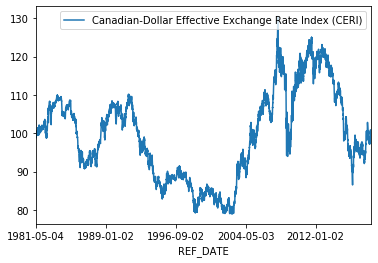

In [27]:
daily_exchange_rate_data_canada.plot()

In [32]:
daily_exchange_rate_data_canada.index = pd.to_datetime( daily_exchange_rate_data_canada.index )

In [73]:
daily_exchange_rate_data_canada

,GEO,Canadian-Dollar Effective Exchange Rate Index (CERI)
REF_DATE,,
1981-05-04,Canada,98.840697
1981-05-05,Canada,98.784083
1981-05-06,Canada,98.850753
1981-05-07,Canada,99.030187
1981-05-08,Canada,98.982241
1981-05-11,Canada,99.068240
1981-05-12,Canada,99.199516
1981-05-13,Canada,99.305652
1981-05-14,Canada,99.531188


In [74]:
mask = (daily_exchange_rate_data_canada.index  < "2004-05-03") & (daily_exchange_rate_data_canada.index > "1981-05-04")

In [75]:
train_range = daily_exchange_rate_data_canada.loc[mask]

In [77]:
del train_range["GEO"] 

In [78]:
train_range

,Canadian-Dollar Effective Exchange Rate Index (CERI)
REF_DATE,
1981-05-05,98.784083
1981-05-06,98.850753
1981-05-07,99.030187
1981-05-08,98.982241
1981-05-11,99.068240
1981-05-12,99.199516
1981-05-13,99.305652
1981-05-14,99.531188
1981-05-15,99.516612


In [79]:
import pandas as pd
from fbprophet import Prophet


In [80]:
train_range.index.names = ["ds"]

In [85]:
train_range.columns = ["y"]

In [91]:
train_range = train_range.reset_index()

In [92]:
m = Prophet()
m.fit(train_range)

In [103]:
future = m.make_future_dataframe(periods=5016)
future.tail()

,ds
11010,2018-01-19
11011,2018-01-20
11012,2018-01-21
11013,2018-01-22
11014,2018-01-23


In [104]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
11010,2018-01-19,105.310951,-123.599943,329.148674
11011,2018-01-20,104.686192,-125.864459,330.097156
11012,2018-01-21,104.678345,-123.542923,328.396535
11013,2018-01-22,105.271120,-123.348022,331.609531
11014,2018-01-23,105.261508,-125.552375,329.526286


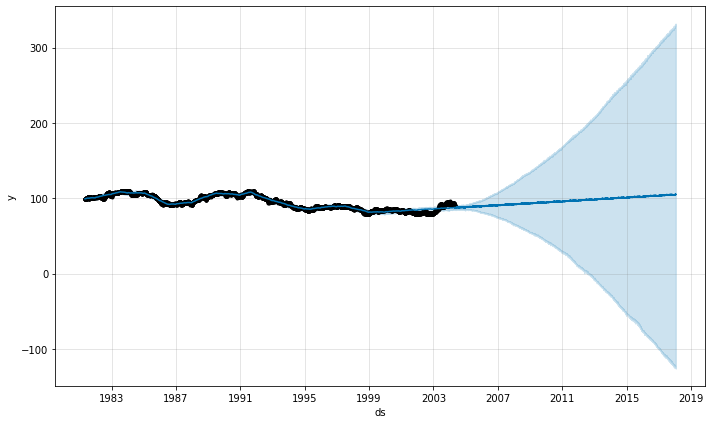

In [105]:
# Python
fig1 = m.plot(forecast)

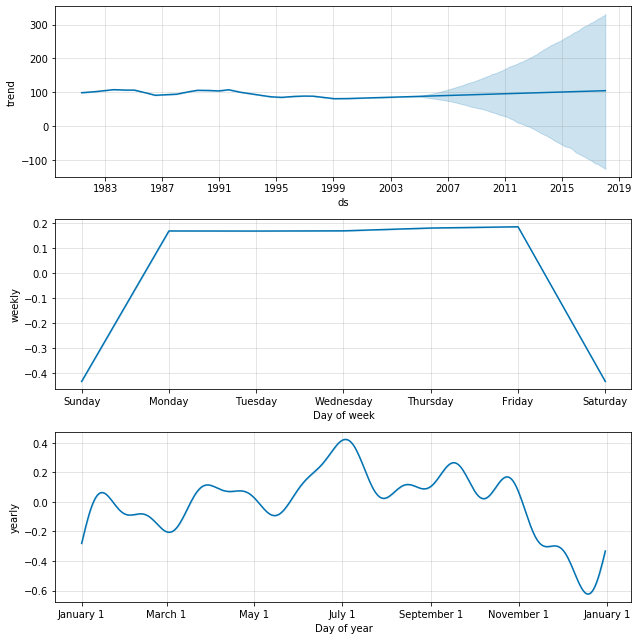

In [108]:
# Python
fig2 = m.plot_components(forecast)

In [109]:
p_forcast = forecast[["ds","yhat"]]

In [110]:
p_forcast = p_forcast.set_index("ds")

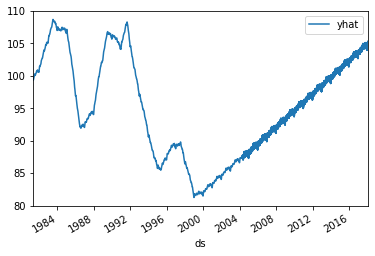

In [112]:
p_forcast.plot()